<a href="https://colab.research.google.com/github/jmershov/SureStartFutureMakers/blob/main/Day_9_MNIST_Dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)

X_train  (60000, 28, 28)
X_test  (10000, 28, 28)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Counts')

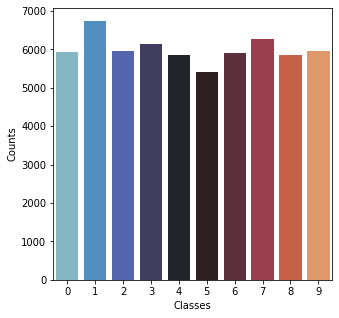

In [4]:
#Label Counts
plt.figure(figsize=(5,5))
sns.countplot(Y_train, palette="icefire")
plt.xlabel("Classes")
plt.ylabel("Counts")

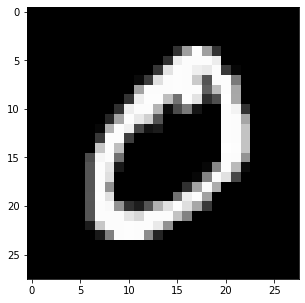

In [5]:
img = X_train[1]
plt.figure(figsize=(5,5))
plt.imshow(img, cmap="gray")

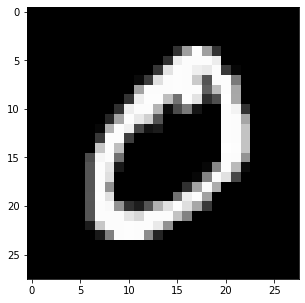

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

img2 = X_train[1]
plt.figure(figsize=(5,5))
plt.imshow(img2, cmap="gray")

In [7]:
Y_train[0]

5

In [8]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
#Reshape model into 4D (Batch Size, Height, Width, Channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [11]:
#Building architecture
model = Sequential()
model.add(Conv2D(filters=20, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 10)        1810      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16064     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [13]:
optimizer = SGD(learning_rate=0.001, momentum=0.99)

In [14]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
BATCH_SIZE = 64
EPOCHS = 10

In [16]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, Y_test))

Epoch 1/10
938/938 [==============================] - 50s 6ms/step - loss: 1.2795 - accuracy: 0.5540 - val_loss: 0.1588 - val_accuracy: 0.9513
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2087 - accuracy: 0.9370 - val_loss: 0.0974 - val_accuracy: 0.9700
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1444 - accuracy: 0.9555 - val_loss: 0.0741 - val_accuracy: 0.9755
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1030 - accuracy: 0.9690 - val_loss: 0.0622 - val_accuracy: 0.9793
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0900 - accuracy: 0.9721 - val_loss: 0.0504 - val_accuracy: 0.9842
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0741 - accuracy: 0.9767 - val_loss: 0.0472 - val_accuracy: 0.9843
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0691 - accuracy: 0.9788 - val_loss: 0.0499 - val_accuracy: 0.9832
Epoch

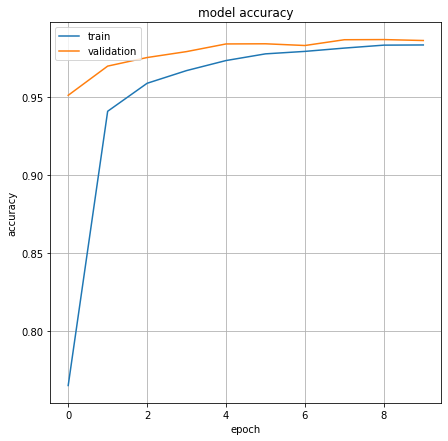

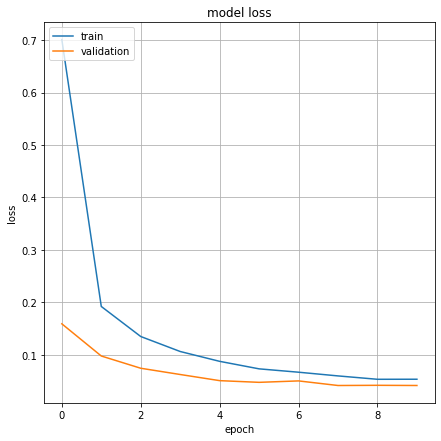

In [17]:
fig = plt.figure(figsize=(7,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(7,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.grid()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()